<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>IBF TFIP</h1>
            <h2>Classification using Scikit Learn</h2>
        </th>
    </tr>
</table>

# Table of Contents <a id='tc'></a>

1. [Problem Statement](#p1)
2. [Techniques to handle class imbalance](#p2)


# Problem Statement <a id='p1' />

### Please use the dataset below to create a Logistic Regression model by executing the intermediate steps.

### Use techniques to handle the class imbalance.

**Data**: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns


## Load dataset

In [56]:
data = pd.read_csv('./Datasets/credit-card.csv')

In [57]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [58]:
data.shape
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [59]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [60]:
# take only 9000 0's sameple
data_0 = data_0.sample(n=9000)

In [61]:
data = data_1.append(data_0)

data.Class.value_counts()

C:\Users\choudhury gouri\AppData\Local\Temp\ipykernel_35636\1730244312.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_1.append(data_0)


0    9000
1     492
Name: Class, dtype: int64

In [63]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


C:\Users\choudhury gouri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


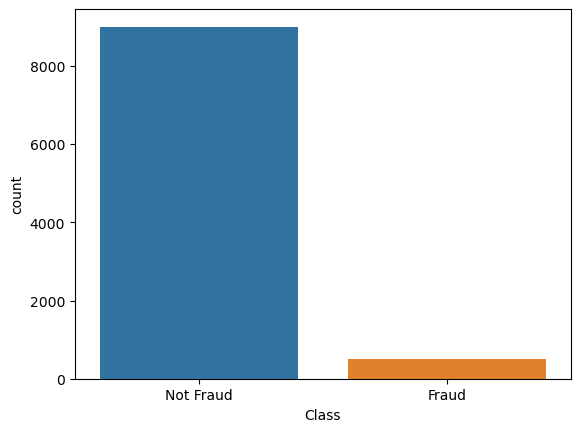

In [64]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [65]:
# check for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

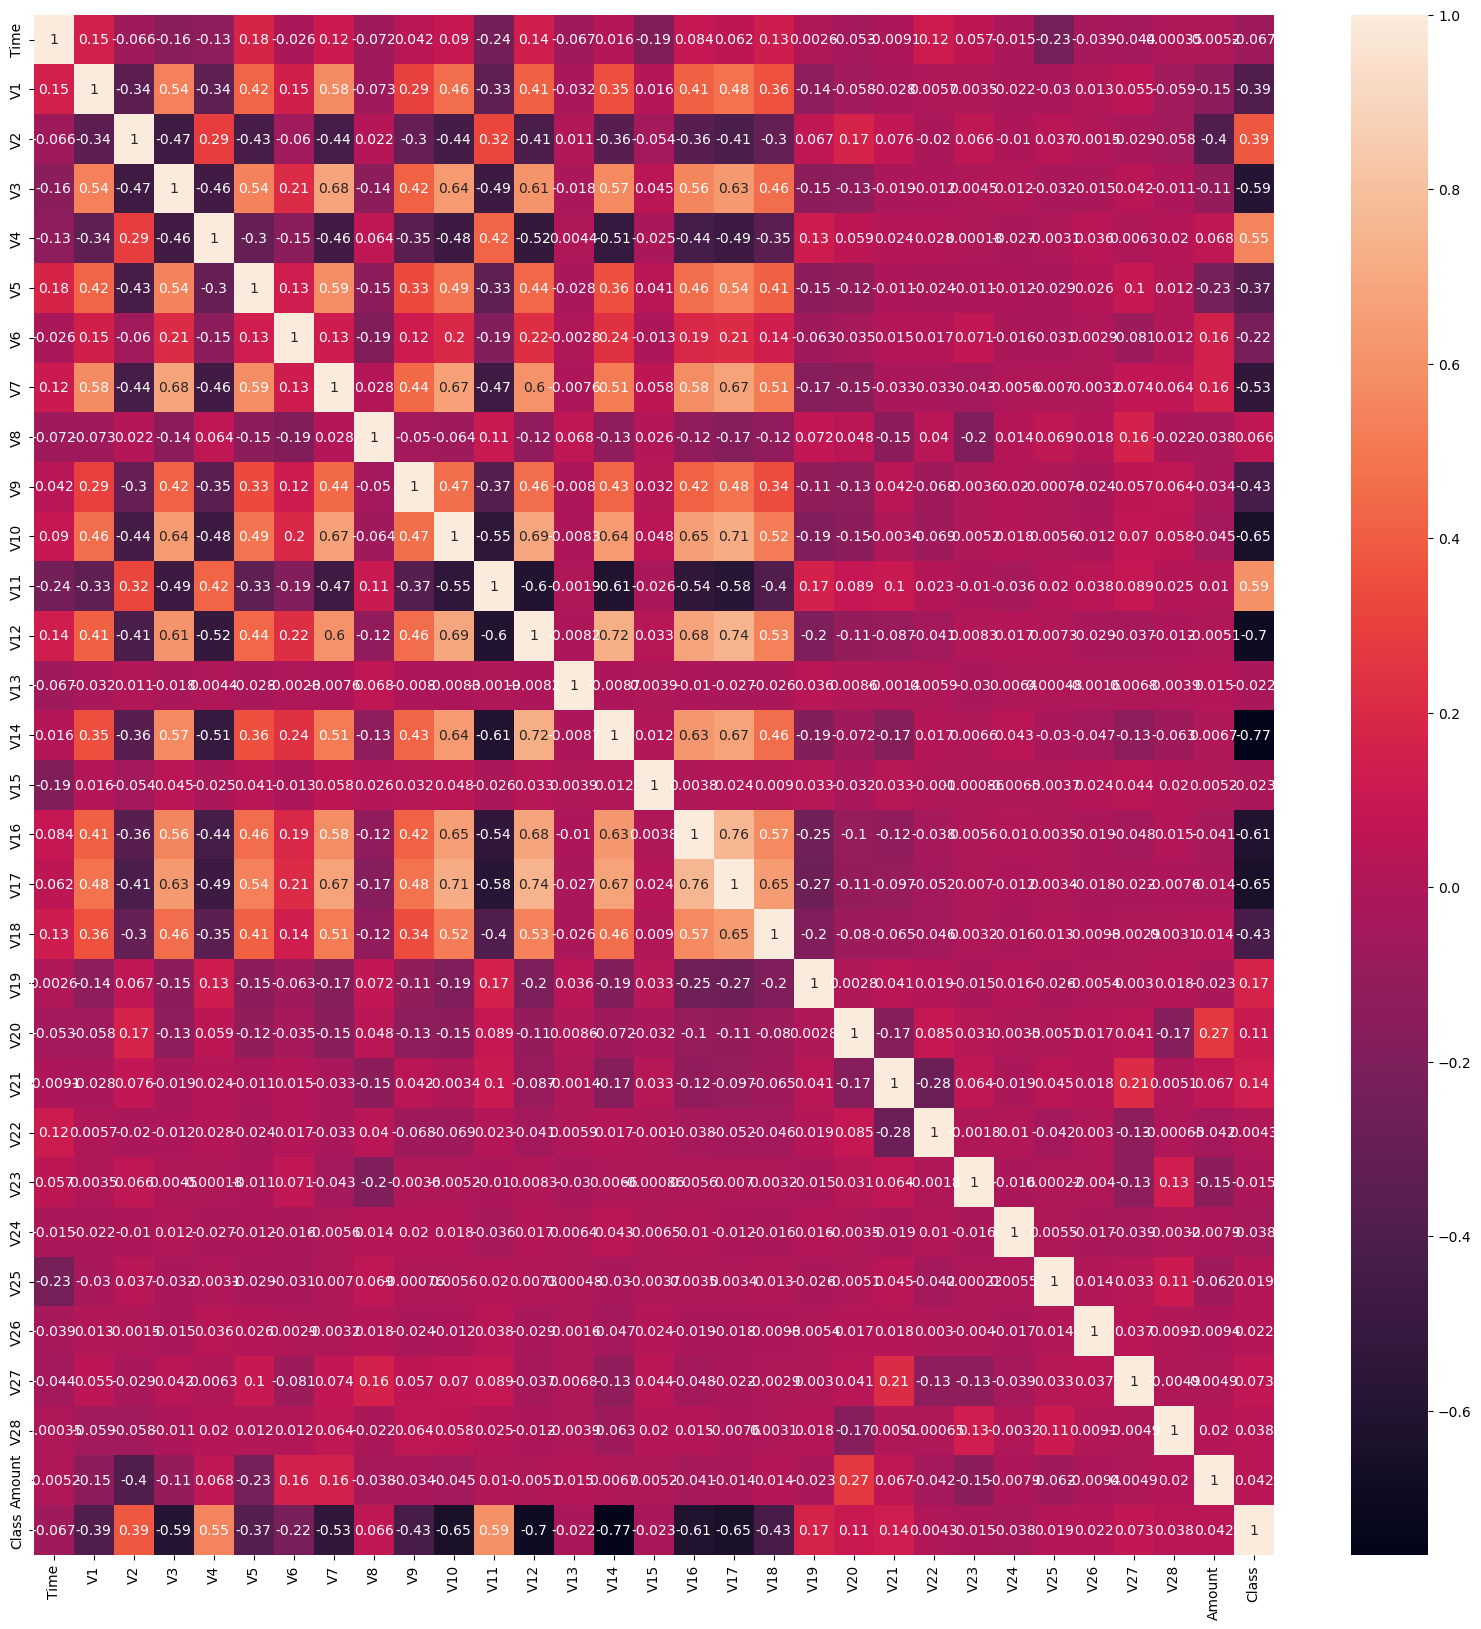

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Response and Target variable

In [67]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 9000)

## Train test split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model using Logitic Regression

In [69]:
# create the object
model =  LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

In [70]:
accuracy_score(y_predict, y_test)

0.9884149552395998

In [71]:
np.unique(y_predict)

array([0, 1], dtype=int64)

In [72]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1814
           1       0.82      0.95      0.88        85

    accuracy                           0.99      1899
   macro avg       0.91      0.97      0.94      1899
weighted avg       0.99      0.99      0.99      1899



**The Metric Trap**

One of the major issues that we face when dealing with imbalanced datasets relates to the evaluation metrics used to evaluate the machine learning model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly imbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features, and it will have a high accuracy rate, this is obviously misleading.

In [73]:
confusion_matrix(y_predict, y_test)

array([[1796,   18],
       [   4,   81]], dtype=int64)

# Handling Class Imbalance <a id='p2' />

##  Resampling Technique

One of the widely adopted class imbalance techniques for dealing with highly imbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

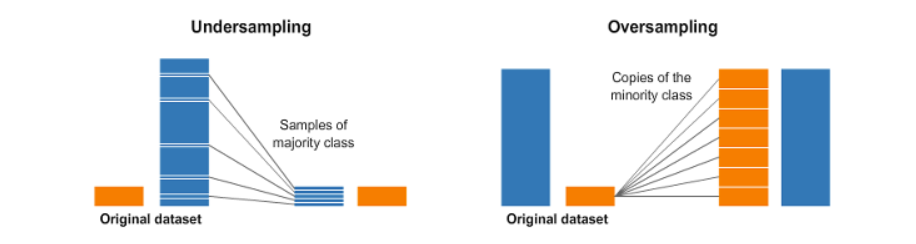


Despite the advantage of balancing classes, these techniques also have their weaknesses.

The simplest implementation of over-sampling is to duplicate random records from the minority class.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information.

Let’s implement this with the credit card fraud detection data.

We will start by separating the class that will be 0 and class 1.

In [74]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [75]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 31)

class 1: (492, 31)


## Random under sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data - millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


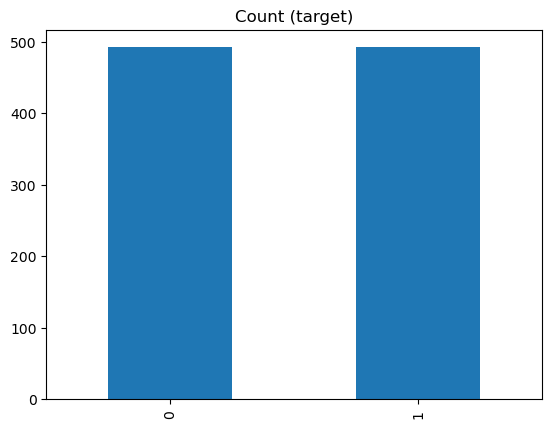

In [76]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Random over sampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have lots of data to work with.

A con to consider when oversampling is that it can cause overfitting and poor generalization to your test set.

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


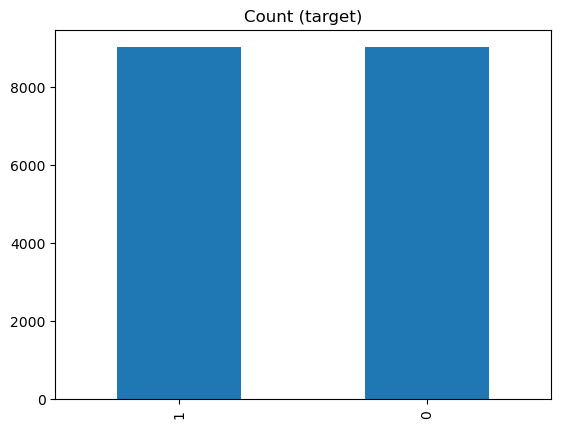

In [77]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [78]:
# import library
import imblearn

## Random under-sampling with Imblearn

RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [79]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


## Random over-sampling with imblearn

One way to handle imbalanced data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by random sampling with replacement of the currently available samples.

In [80]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


## Under-sampling Tomek links

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other.

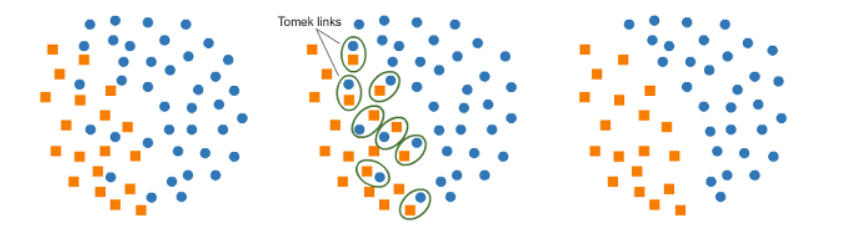

In [81]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority') #majority refers to resample of majority class.

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 8839, 1: 492})


## Synthetic minority over-sampleing technique

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

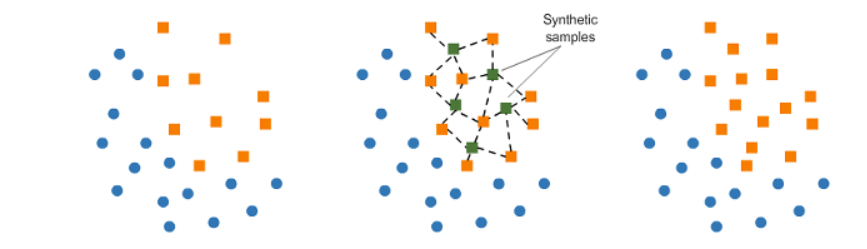

**SMOTE algorithm** works in 4 simple steps:

- Choose a minority class as the input vector.
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
- Repeat the steps until the data is balanced.

In [82]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 9000, 1: 492})
Resampple dataset shape: Counter({1: 9000, 0: 9000})


In [83]:
# Run logistic regression with the new data

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [84]:
# create the object
model =  LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

In [85]:
accuracy_score(y_predict, y_test)

0.9661111111111111

In [86]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1851
           1       0.96      0.98      0.97      1749

    accuracy                           0.97      3600
   macro avg       0.97      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600



**************************   This is the end of our session ******************************

Copyright © 2023 by Boston Consulting Group. All rights reserved.